<a href="https://colab.research.google.com/github/gnodking7/WDAnepv/blob/main/Example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
In this example, we consider a couple of positive matrices that examplify the advantage of Acc_SK [1] algorithm over SK [2] algorithm.

In particular, these positive matrices are the exponential Euclidean distance matrices that arise from the computation of a regularized Wasserstein distance between data matrices.

We will go over the background of the example in the following order:


1.   What are Acc_SK and SK?
2.   What is regularzied Wasserstein distance?
3.   Where do these data matrices come from?

### What are Acc_SK and SK?
Acc_SK and SK share a common goal:

"Given a positive matrix $\mathbf{K}\in\mathbb{R}_+^{n\times m}$ obtain a matrix of the form $\mathbf{T}=\mathcal{D}(\mathbf{u})\mathbf{K}\mathcal{D}(\mathbf{v})\in\mathbb{R}_+^{n\times m}$ with desired row and column sums"

$\mathcal{D}(\mathbf{u})\in\mathbb{R}_+^{n\times n}$ and $\mathcal{D}(\mathbf{v})\in\mathbb{R}_+^{m\times m}$ represent diagonal matrices with diagonal elements $\mathbf{u}\in\mathbb{R}_+^n$ and $\mathbf{v}\in\mathbb{R}_+^m$, respectively.

In particular, we consider the resulting matrix $\mathbf{T}$ to have the row sum $\mathcal{1}/n$ and the columnn sum $\mathcal{1}/m$.

### What is regularized Wasserstein distance?
Wasserstein distance and regularized Wasswerstein distance belong in a family of distances for probability measures [3]. Regularized Wasserstein distance between data matrices $\mathbf{X}^c\in\mathbb{R}^{d\times n_c}$ and $\mathbf{X}^{c'}\in\mathbb{R}^{d\times n_{c'}}$ can be defined by associating with these data matrices the uniform probability vectors $\mathbf{r}=\frac{1}{n_c}\mathbf{1}_{n_c}\in\mathbb{R}^{n_c}$ and  $\mathbf{c}=\frac{1}{n_{c'}}\mathbf{1}_{n_{c'}}\in\mathbb{R}^{n_{c'}}$, respectively [4].

Then, the regularized Wasserstein distance between $\mathbf{X}^c$ and $\mathbf{X}^{c'}$ is
$$W_\lambda(\mathbf{X}^c,\mathbf{X}^{c'}):=\langle\mathbf{T}^\lambda,\mathbf{M}_{\mathbf{X}^c,\mathbf{X}^{c'}}\rangle$$
the Frobenius inner product between $\mathbf{T}^\lambda$ and $\mathbf{M}_{\mathbf{X}^c,\mathbf{X}^{c'}}$. $\mathbf{M}_{\mathbf{X}^c,\mathbf{X}^{c'}}$ is defined as the Euclidean distance matrix between data vectors in $\mathbf{X}^c$ and data vectors in $\mathbf{X}^{c'}$, i.e.,
$$\mathbf{M}_{\mathbf{X}^c,\mathbf{X}^{c'}}:=\Big( [\|\mathbf{x}_i^c-\mathbf{x}_j^{c'}\|_2^2]_{ij} \Big) \in\mathbb{R}^{n_c\times n_{c'}}$$
The optimal regularized transport matrix
$\mathbf{T}^\lambda$ is the solution to
an entropy-smoothed optimal transport problem
$$\mathbf{T}^\lambda:=\mbox{argmin}_{\mathbf{T}\in U_{n_cn_{c'}}}\, \Big\{\lambda\langle\mathbf{T},\mathbf{M}_{\mathbf{X}^c,\mathbf{X}^{c'}}\rangle-h(\mathbf{T}) \Big\}$$
with the regularization parameter $\lambda>0$ and the entropy $h(\mathbf{T}):=-\sum_{ij}T_{ij}\log(T_{ij})$. 

$U_{n_c,n_{c'}}$ is the transport polytope of $\mathbf{r}$ and $\mathbf{c}$ 
containing all possible transport matrices between class $c$ and class $c'$, and is defined as
$$U_{n_c,n_{c'}}:=\{\mathbf{T} \mid \mathbf{T}\in\mathbb{R}_{+}^{n_c\times n_{c'}},\, 
\mathbf{T}\mathbf{1}_{n_{c'}}=\frac{1}{n_c}\mathbf{1}_{n_c},\, 
\mathbf{T}^T\mathbf{1}_{n_c}=\frac{1}{n_{c'}}\mathbf{1}_{n_{c'}}\}$$

It can be shown that $\mathbf{T}^\lambda$ has the form $\mathbf{T}^\lambda=\mathcal{D}(\mathbf{u})\mathbf{K}\mathcal{D}(\mathbf{v})$ with $(\mathbf{K}^{c,c'})_{ij}=e^{-\lambda\|\mathbf{x}_i^c-\mathbf{x}_j^{c'}\|_2^2}$. Therefore, computing $\mathbf{T}^\lambda$ can be achieved by either Acc_SK or SK on the matrix $\mathbf{K}$. 

In this example, we consider two positive matrices $\mathbf{K}^{1,2}$ and $\mathbf{K}^{1,1}$ to compare Acc_SK and SK on:


*   $\mathbf{K}^{1,2}$ is formed from the data matrices $\mathbf{X}^1$ and $\mathbf{X}^2$
*   $\mathbf{K}^{1,1}$ is formed from the data matrix $\mathbf{X}^1$

### Where do these data matrices come from?
The data matrices come from a synthetically generated dataset with three classes. The data matrices are:
$$\mathbf{X}^1\in\mathbb{R}^{2\times 30},\quad \mathbf{X}^2\in\mathbb{R}^{2\times 40},\quad \mathbf{X}^3\in\mathbb{R}^{2\times 30}$$
The dataset is generated such that the data points are centered around the coordinates $(-5,0)$ and $(5,0)$ for Class 1, centered around the coordinates $(-3,3)$ and $(3,-3)$ for Class 2, and centered around the coordinates $(-3,-3)$ and $(3,3)$ for Class 3. These data points are randomly drawn at their corresponding centers using a Guassian distribution with a standard deviation of 0.5, and the number of data points for each class are equally split among its two clusters. Finally, the dataset is standardized.

The plot of the dataset is shown below:


In [1]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [5]:
import WDA_subfunc as sub
import WDA_datasets as datasets
import numpy as np
import matplotlib.pylab as pl

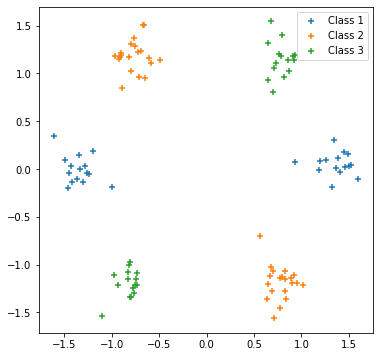

In [19]:
TR, TR_L, TST, TST_L = datasets.load_synth(2, 100, 100)

pl.figure(1, figsize=(6, 6))
pl.scatter(TR[np.where(TR_L==1), 0], TR[np.where(TR_L==1), 1], marker='+', label='Class 1')
pl.scatter(TR[np.where(TR_L==2), 0], TR[np.where(TR_L==2), 1], marker='+', label='Class 2')
pl.scatter(TR[np.where(TR_L==3), 0], TR[np.where(TR_L==3), 1], marker='+', label='Class 3')
pl.legend()

The matrices $\mathbf{K}^{1,2}\in\mathbb{R}^{30\times40}$ and $\mathbf{K}^{1,1}\in\mathbb{R}^{30\times 30}$ are formed as
$$(\mathbf{K}^{1,2})_{ij}=e^{-\lambda\|\mathbf{x}_i^{[1]}-\mathbf{x}_j^{[2]}\|_2^2},\qquad(\mathbf{K}^{1,1})_{ij}=e^{-\lambda\|\mathbf{x}_i^{[1]}-\mathbf{x}_j^{[1]}\|_2^2}$$
We consider regularization parameter $\lambda=0.01, 0.1$ for both matrices. 

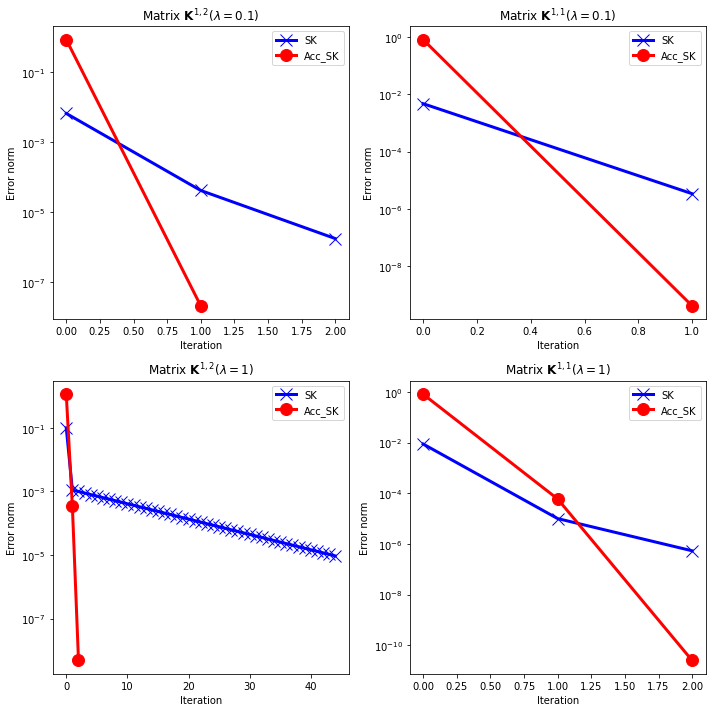

In [28]:
# Get data matrices 
X1 = TR[TR_L == 1, :]
X2 = TR[TR_L == 2, :]

# Compute matrix K (for lambda=0.01), compute errors of SK and Acc_SK, and plot errors
M12 = sub.dist(X1, X2)
M11 = sub.dist(X1, X1)
lamb = 0.1
K12 = np.exp(-lamb * M12)
K11 = np.exp(-lamb * M11)

K12_u1, K12_v1, Err_K12_1 = sub.SK(K12) # SK K12
K12_u2, K12_v2, Err_K12_2 = sub.Acc_SK(K12) # Acc_SK K12
K11_u1, K11_v1, Err_K11_1 = sub.SK(K11) # SK K11
K11_u2, K11_v2, Err_K11_2 = sub.Acc_SK(K11) # Acc_SK K11

pl.figure(1, figsize=(10, 10))

pl.subplot(2, 2, 1)
pl.semilogy(Err_K12_1, 'bx-', linewidth=3, markersize=12, label='SK')
pl.semilogy(Err_K12_2, 'ro-', linewidth=3, markersize=12, label='Acc_SK')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('Error norm')
pl.title('Matrix $\mathbf{K}^{1,2} (\lambda = 0.1)$')

pl.subplot(2, 2, 2)
pl.semilogy(Err_K11_1, 'bx-', linewidth=3, markersize=12, label='SK')
pl.semilogy(Err_K11_2, 'ro-', linewidth=3, markersize=12, label='Acc_SK')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('Error norm')
pl.title('Matrix $\mathbf{K}^{1,1} (\lambda = 0.1)$')

# Compute matrix K (for lambda=0.1), compute errors of SK and Acc_SK, and plot errors
M12 = sub.dist(X1, X2)
M11 = sub.dist(X1, X1)
lamb = 1
K12 = np.exp(-lamb * M12)
K11 = np.exp(-lamb * M11)

K12_u1, K12_v1, Err_K12_1 = sub.SK(K12) # SK K12
K12_u2, K12_v2, Err_K12_2 = sub.Acc_SK(K12) # Acc_SK K12
K11_u1, K11_v1, Err_K11_1 = sub.SK(K11) # SK K11
K11_u2, K11_v2, Err_K11_2 = sub.Acc_SK(K11) # Acc_SK K11

pl.subplot(2, 2, 3)
pl.semilogy(Err_K12_1, 'bx-', linewidth=3, markersize=12, label='SK')
pl.semilogy(Err_K12_2, 'ro-', linewidth=3, markersize=12, label='Acc_SK')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('Error norm')
pl.title('Matrix $\mathbf{K}^{1,2} (\lambda = 1)$')

pl.subplot(2, 2, 4)
pl.semilogy(Err_K11_1, 'bx-', linewidth=3, markersize=12, label='SK')
pl.semilogy(Err_K11_2, 'ro-', linewidth=3, markersize=12, label='Acc_SK')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('Error norm')
pl.title('Matrix $\mathbf{K}^{1,1} (\lambda = 1)$')

pl.tight_layout()

# References

[1] A Aristodemo and L Gemignani. Accelerating the sinkhorn–knopp iteration by arnoldi-type
methods. Calcolo, 57(1):1–17, 2020.

[2] Richard Sinkhorn. Diagonal equivalence to matrices with prescribed row and column sums.
The American Mathematical Monthly, 74(4):402–405, 1967.

[3] Marco Cuturi. Sinkhorn distances: lightspeed computation of optimal transport. In NIPS,
volume 2, page 4, 2013.

[4] R ́emi Flamary, Marco Cuturi, Nicolas Courty, and Alain Rakotomamonjy. Wasserstein dis-
criminant analysis. Machine Learning, 107(12):1923–1945, 2018.